# KNeighborsClassifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [ ]:
movies_df1 = pd.read_csv('/content/Tamil_movies_dataset.csv')

In [ ]:
movies_df1.head()

,MovieName,Genre,Rating,Director,Actor,PeopleVote,Year,Hero_Rating,movie_rating,content_rating
0,Mouna Guru,Action,7.7,Santha Kumar,Arulnithi,746,2011,8,8,7.900000
1,7 Aum Arivu,Action,6.2,A.R. Murugadoss,Suriya,9479,2011,9,9,8.066667
2,Vaagai Sooda Vaa,Comedy,8.0,A. Sarkunam,Vimal,14522,2011,8,7,7.666667
3,Mankatha,Action,7.6,Venkat Prabhu,Ajith Kumar,12276,2011,6,8,7.200000
4,Kanchana: Muni 2,Comedy,6.5,Lawrence Raghavendra,Lawrence Raghavendra,1044,2011,8,9,7.833333


In [ ]:
movies_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MovieName       329 non-null    object 
 1   Genre           329 non-null    object 
 2   Rating          329 non-null    float64
 3   Director        329 non-null    object 
 4   Actor           329 non-null    object 
 5   PeopleVote      329 non-null    int64  
 6   Year            329 non-null    int64  
 7   Hero_Rating     329 non-null    int64  
 8   movie_rating    329 non-null    int64  
 9   content_rating  329 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 25.8+ KB


In [ ]:
rating_threshold=5.0
X = movies_df1[['Genre', 'Year']]
y = (movies_df1['Rating']>).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('genre', OneHotEncoder(handle_unknown='ignore'), ['Genre']),
    ],
    remainder='passthrough'
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=20))  # Adjust k as needed
])

In [ ]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('genre',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=20))])

In [ ]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8787878787878788


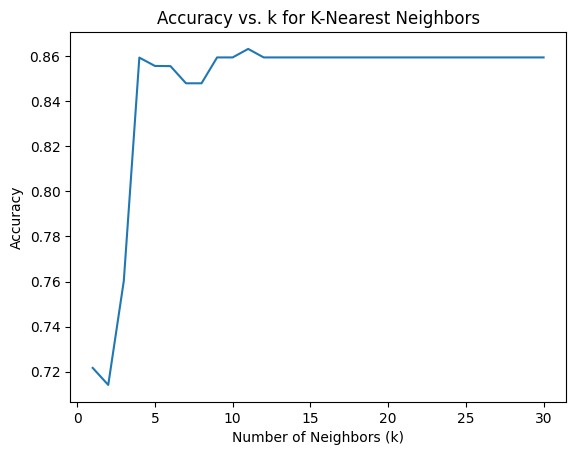

In [ ]:

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

k_values = list(range(1, 31))
accuracy_scores = []

for k in k_values:
  pipeline = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('classifier', KNeighborsClassifier(n_neighbors=k))
  ])
  cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
  accuracy_scores.append(cv_scores.mean())

plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for K-Nearest Neighbors')
plt.show()

In [ ]:
def recommend_movies_knn_classifier(genre, min_rating, year, df=movies_df1):
    filtered_df = df[(df['Genre'].str.contains(genre, case=False)) & (df['Year'] >= year)]

    if filtered_df.empty:
        return pd.DataFrame()  # No movies match genre and year criteria

    X_filtered = filtered_df[['Genre', 'Year']]
    filtered_df['Recommended'] = pipeline.predict(X_filtered)

    recommendations = filtered_df[(filtered_df['Recommended'] == 1) & (filtered_df['Rating'] >= min_rating)]
    recommendations = recommendations.sort_values(by='Rating', ascending=False)
    return recommendations[['MovieName', 'Genre', 'Rating', 'Year']].reset_index(drop=True)

genre = input("Enter a genre (e.g., Crime, Action, Drama, Comedy, etc.): ")
min_rating = float(input("Enter minimum rating (0-10): "))
year = int(input("Enter the year: "))

recommended_movies = recommend_movies_knn_classifier(genre, min_rating, year)

if not recommended_movies.empty:
    print("Recommended Movies:")
    print(recommended_movies)
else:
    print("No movies found matching your criteria.")

Enter a genre (e.g., Crime, Action, Drama, Comedy, etc.): Drama
Enter minimum rating (0-10): 4.4
Enter the year: 2009
Recommended Movies:
                              MovieName  Genre  Rating  Year
0                               Peranbu  Drama     9.0  2018
1                     Pariyerum Perumal  Drama     8.8  2018
2                                 Aruvi  Drama     8.6  2017
3                                    96  Drama     8.6  2018
4                 Merku Thodarchi Malai  Drama     8.6  2018
5                             Papanasam  Drama     8.4  2015
6                        Kurangu Bommai  Drama     8.1  2017
7                     Aandavan Kattalai  Drama     8.1  2016
8                      Deiva Thirumagal  Drama     8.1  2011
9                              Paradesi  Drama     8.0  2013
10                     Kuttram Kadithal  Drama     8.0  2015
11                                Jiivi  Drama     7.9  2019
12                       Thanga Meengal  Drama     7.9  2013
13      

<ipython-input-177-f55c2ff6a21c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Recommended'] = pipeline.predict(X_filtered)


## RandomForestClassifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import RandomForest classifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [ ]:
movies_df2 = pd.read_csv('/content/Tamil_movies_dataset.csv')

In [ ]:
movies_df2.head()

,MovieName,Genre,Rating,Director,Actor,PeopleVote,Year,Hero_Rating,movie_rating,content_rating
0,Mouna Guru,Action,7.7,Santha Kumar,Arulnithi,746,2011,8,8,7.900000
1,7 Aum Arivu,Action,6.2,A.R. Murugadoss,Suriya,9479,2011,9,9,8.066667
2,Vaagai Sooda Vaa,Comedy,8.0,A. Sarkunam,Vimal,14522,2011,8,7,7.666667
3,Mankatha,Action,7.6,Venkat Prabhu,Ajith Kumar,12276,2011,6,8,7.200000
4,Kanchana: Muni 2,Comedy,6.5,Lawrence Raghavendra,Lawrence Raghavendra,1044,2011,8,9,7.833333


In [ ]:
rating_threshold = 6.0
X = movies_df2[['Genre', 'Year']]
y = (movies_df2['Rating'] >= rating_threshold).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('genre',
         OneHotEncoder(handle_unknown='ignore'), ['Genre']),
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('genre',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.6515151515151515


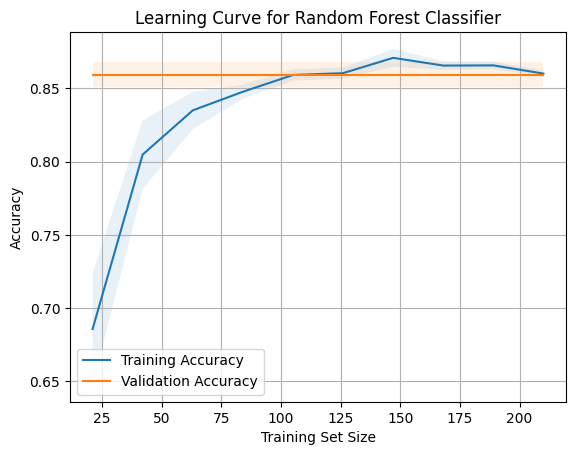

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Random Forest Classifier')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
def recommend_movies_rf_classifier(genre, min_rating, year, df=movies_df):

    filtered_df = df[(df['Genre'].str.contains(genre, case=False)) & (df['Year'] >= year)]

    if filtered_df.empty:
        return pd.DataFrame()

    X_filtered = filtered_df[['Genre', 'Year']]
    filtered_df['Recommended'] = pipeline.predict(X_filtered)

    recommendations = filtered_df[(filtered_df['Recommended'] == 1) & (filtered_df['Rating'] >= min_rating)]
    recommendations = recommendations.sort_values(by='Rating', ascending=False)

    return recommendations[['MovieName', 'Genre', 'Rating', 'Year']].reset_index(drop=True)

genre = input("Enter a genre (e.g., Crime, Action, Drama, Comedy, etc.): ")
min_rating = float(input("Enter minimum rating (0-10): "))
year = int(input("Enter the year: "))

recommended_movies = recommend_movies_rf_classifier(genre, min_rating, year)

if not recommended_movies.empty:
    print("Recommended Movies:")
    print(recommended_movies)
else:
    print("No movies found matching your criteria.")

Enter a genre (e.g., Crime, Action, Drama, Comedy, etc.): Crime
Enter minimum rating (0-10): 5.5
Enter the year: 2012
Recommended Movies:
             MovieName  Genre  Rating  Year
0           Visaaranai  Crime     8.5  2015
1    Vazhakku Enn 18/9  Crime     8.3  2012
2    Sathuranga Vettai  Crime     8.1  2014
3               Iraivi  Crime     8.0  2016
4             Magamuni  Crime     7.9  2019
5              Thegidi  Crime     7.8  2014
6   Kuttrame Thandanai  Crime     7.8  2016
7                 Naan  Crime     7.5  2012
8        Vellai Pookal  Crime     7.2  2019
9               Kirumi  Crime     7.0  2015
10       Thappu Thanda  Crime     6.0  2017
11             Thondan  Crime     6.0  2017
12       Pagadi Aattam  Crime     5.8  2017


<ipython-input-319-5fb17430c645>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Recommended'] = pipeline.predict(X_filtered)


# XG BOOST

In [ ]:
pip install xgboost


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [ ]:
rating_threshold = 5.0
X = movies_df[['Genre', 'Year']]
y = (movies_df['Rating'] >= rating_threshold).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('genre', OneHotEncoder(handle_unknown='ignore'), ['Genre']),
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='mlogloss'))
])


In [ ]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('genre',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=Fal...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[ 1 12]
 [ 2 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.08      0.12        13
           1       0.81      0.96      0.88        53

    accuracy                           0.79        66
   macro avg       0.57      0.52      0.50        66
weighted avg       0.72      0.79      0.73        66



In [ ]:
y_pred = pipeline.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy}")

Accuracy: 0.8333333333333334


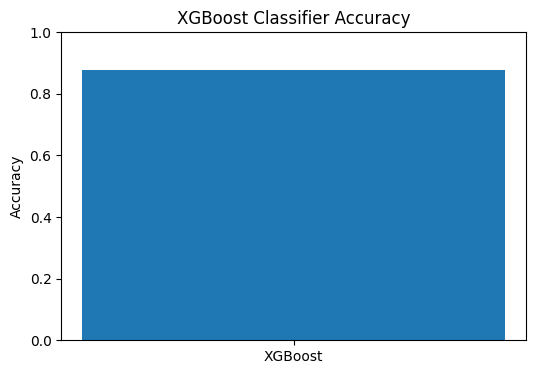

In [ ]:
import matplotlib.pyplot as plt
acc =accuracy

plt.figure(figsize=(6, 4))
plt.bar(['XGBoost'], [acc])
plt.ylabel('Accuracy')
plt.title('XGBoost Classifier Accuracy')
plt.ylim(0, 1)
plt.show()

In [ ]:
def recommend_movies_xgb_classifier(genre, min_rating, year, df=movies_df):

    filtered_df = df[(df['Genre'].str.contains(genre, case=False)) & (df['Year'] >= year)]

    if filtered_df.empty:
        return pd.DataFrame()


    X_filtered = filtered_df[['Genre', 'Year']]
    filtered_df['Recommended'] = pipeline.predict(X_filtered)


    recommendations = filtered_df[(filtered_df['Recommended'] == 1) & (filtered_df['Rating'] >= min_rating)]
    recommendations = recommendations.sort_values(by='Rating', ascending=False)

    return recommendations[['MovieName', 'Genre', 'Rating', 'Year']].reset_index(drop=True)


genre = input("Enter a genre (e.g., Crime, Action, Drama, Comedy, etc.): ")
min_rating = float(input("Enter minimum rating (0-10): "))
year = int(input("Enter the year: "))

recommended_movies = recommend_movies_xgb_classifier(genre, min_rating, year)

if not recommended_movies.empty:
    print("Recommended Movies:")
    print(recommended_movies)
else:
    print("No movies found matching your criteria.")

Enter a genre (e.g., Crime, Action, Drama, Comedy, etc.): Action
Enter minimum rating (0-10): 6.7
Enter the year: 2015
Recommended Movies:
                      MovieName   Genre  Rating  Year
0                  Vikram Vedha  Action     8.7  2017
1                    Raatchasan  Action     8.7  2018
2                        Asuran  Action     8.6  2019
3                        Kaithi  Action     8.5  2019
4                  Vada Chennai  Action     8.5  2018
5                  Thani Oruvan  Action     8.4  2015
6                  Super Deluxe  Action     8.4  2019
7        Dhuruvangal Pathinaaru  Action     8.4  2016
8       Theeran Adhigaram Ondru  Action     8.2  2017
9                        Thadam  Action     8.2  2019
10  Baahubali 2: The Conclusion  Action     8.2  2017
11             Nerkonda Paarvai  Action     8.2  2019
12                   Maanagaram  Action     8.1  2017
13                      Uriyadi  Action     8.1  2016
14                           24  Action     7.8  20

<ipython-input-119-1d41313d86f9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Recommended'] = pipeline.predict(X_filtered)


In [ ]:
import pandas as pd        #Rule-Based Filtering


movies_df = pd.read_csv('/content/Tamil_movies_dataset.csv')


def recommend_movies(genre, min_rating, year, df=movies_df):
    recommendations = df[
        (df['Genre'].str.contains(genre, case=False)) &
        (df['Rating'] >= min_rating) &
        (df['Year'] >= year)
    ]

    recommendations = recommendations.sort_values(by='Rating', ascending=False)
    return recommendations[['MovieName', 'Genre', 'Rating', 'Year']].reset_index(drop=True)
genre = input("Enter preferred genre: ")
min_rating = float(input("Enter minimum rating (0-10): "))
year = int(input("Enter the year: "))



recommended_movies = recommend_movies(genre, min_rating, year)

if not recommended_movies.empty:
    print("Recommended Movies:")
    print(recommended_movies)
else:
    print("No movies2 found matching your criteria.")


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer       #Content-Based Filtering with TF-IDF and Cosine Similarity.
from sklearn.metrics.pairwise import cosine_similarity

movies_df5 = pd.read_csv('/content/Tamil_movies_dataset.csv')

movies_df5['Genre'] = movies_df5['Genre'].fillna('')

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['Genre'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)



def recommend_movies_ml(genre, min_rating, year, cosine_sim=cosine_sim, df=movies_df):
    genre_indices = df.index[df['Genre'].str.contains(genre, case=False)].tolist()

    if not genre_indices:
        return pd.DataFrame()

    sim_scores = []
    for idx in genre_indices:
        sim_scores += list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)


    movie_indices = [i[0] for i in sim_scores[1:11]]

    recommendations = df.iloc[movie_indices]
    recommendations = recommendations[(recommendations['Rating'] >= min_rating) &
                                       (recommendations['Year'] >= year)]

    return recommendations[['MovieName', 'Genre', 'Rating', 'Year']].sort_values(by='Rating', ascending=False)

genre = input("Enter a genre (ex: Crime, Action, Drama, Comedy ect..,): ")
min_rating = float(input("Enter minimum rating (0-10): "))
year = int(input("Enter the year: "))

recommended_movies = recommend_movies_ml(genre, min_rating, year)

if not recommended_movies.empty:
    print("Recommended Movies:")
    print(recommended_movies)
else:
    print("No movies found matching your criteria.")


Enter a genre (ex: Crime, Action, Drama, Comedy ect..,): Crime
Enter minimum rating (0-10): 6.7
Enter the year: 2007
Recommended Movies:
             MovieName  Genre  Rating  Year
64          Visaaranai  Crime     8.5  2015
17   Vazhakku Enn 18/9  Crime     8.3  2012
53   Sathuranga Vettai  Crime     8.1  2014
94              Iraivi  Crime     8.0  2016
59             Thegidi  Crime     7.8  2014
89  Kuttrame Thandanai  Crime     7.8  2016
14                Naan  Crime     7.5  2012
69              Kirumi  Crime     7.0  2015


Decision tree Classs

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTree classifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [ ]:
movies_df2 = pd.read_csv('/content/Tamil_movies_dataset.csv')

In [ ]:
rating_threshold = 5.0
X = movies_df2[['Genre', 'Year']]
y = (movies_df2['Rating'] >= rating_threshold).astype(int)

In [ ]:
movies_df2.head()

,MovieName,Genre,Rating,Director,Actor,PeopleVote,Year,Hero_Rating,movie_rating,content_rating
0,Mouna Guru,Action,7.7,Santha Kumar,Arulnithi,746,2011,8,8,7.900000
1,7 Aum Arivu,Action,6.2,A.R. Murugadoss,Suriya,9479,2011,9,9,8.066667
2,Vaagai Sooda Vaa,Comedy,8.0,A. Sarkunam,Vimal,14522,2011,8,7,7.666667
3,Mankatha,Action,7.6,Venkat Prabhu,Ajith Kumar,12276,2011,6,8,7.200000
4,Kanchana: Muni 2,Comedy,6.5,Lawrence Raghavendra,Lawrence Raghavendra,1044,2011,8,9,7.833333


In [ ]:
movies_df2.tail()

,MovieName,Genre,Rating,Director,Actor,PeopleVote,Year,Hero_Rating,movie_rating,content_rating
324,Dhilluku Dhuddu 2,Comedy,5.3,Rambala,Santhanam,497,2019,7,9,7.100000
325,Dev,Action,4.8,Rajath Ravishankar,Karthi,724,2019,5,8,5.933333
326,Charlie Chaplin 2,Comedy,3.8,Sakthi Chidambaram,Prabhu Deva,215,2019,4,7,4.933333
327,Petta,Action,7.3,Karthik Subbaraj,Rajinikanth,7545,2019,8,8,7.766667
328,Viswasam,Action,6.7,Siva,Ajith Kumar,5907,2019,8,9,7.900000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ('genre', OneHotEncoder(handle_unknown='ignore'), ['Genre']),
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('genre',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8939393939393939


In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)


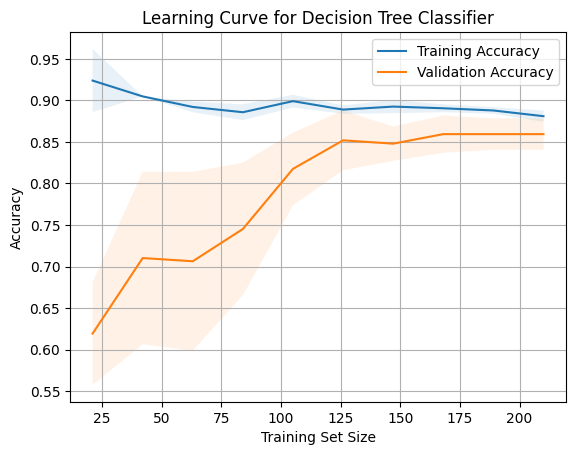

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Decision Tree Classifier')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
def recommend_movies_dt_classifier(genre, min_rating, year, df=movies_df2):
    filtered_df = df[(df['Genre'].str.contains(genre, case=False)) & (df['Year'] >= year)]
    if filtered_df.empty:
        return pd.DataFrame()

    X_filtered = filtered_df[['Genre', 'Year']]
    filtered_df['Recommended'] = pipeline.predict(X_filtered)

    recommendations = filtered_df[(filtered_df['Recommended'] == 1) & (filtered_df['Rating'] >= min_rating)]
    recommendations = recommendations.sort_values(by='Rating', ascending=False)

    return recommendations[['MovieName', 'Genre', 'Rating', 'Year']].reset_index(drop=True)

genre = input("Enter a genre (e.g., Crime, Action, Drama, Comedy, etc.): ")
min_rating = float(input("Enter minimum rating (0-10): "))
year = int(input("Enter the year: "))

recommended_movies = recommend_movies_dt_classifier(genre, min_rating, year)

if not recommended_movies.empty:
    print("Recommended Movies:")
    print(recommended_movies)
else:
    print("No movies found matching your criteria.")

Enter a genre (e.g., Crime, Action, Drama, Comedy, etc.): Action
Enter minimum rating (0-10): 4
Enter the year: 2005
Recommended Movies:
                MovieName   Genre  Rating  Year
0              Raatchasan  Action     8.7  2018
1            Vikram Vedha  Action     8.7  2017
2                  Asuran  Action     8.6  2019
3                  Kaithi  Action     8.5  2019
4            Vada Chennai  Action     8.5  2018
..                    ...     ...     ...   ...
132          Saamy Square  Action     4.5  2018
133            Seema Raja  Action     4.5  2018
134            Neruppu Da  Action     4.3  2017
135            Kanchana 3  Action     4.2  2019
136  Sakka Podu Podu Raja  Action     4.2  2017

[137 rows x 4 columns]


<ipython-input-389-d7f747d2172a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Recommended'] = pipeline.predict(X_filtered)
